In [13]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.6/150.0 MB 4.5 MB/s eta 0:00:34
   ---------------------------------------- 1.0/150.0 MB 5.9 MB/s eta 0:00:26
   ---------------------------------------- 1.3/150.0 MB 5.8 MB/s eta 0:00:26
   ---------------------------------------- 1.4/150.0 MB 5.8 MB/s eta 0:00:26
   ---------------------------------------- 1.4/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.8/150.0 MB 5.1 MB/s eta 0:00:29
    --------------------------------------- 2.2/150.0 MB 5.3 MB/s eta 0:00:29
    --------------------------------------- 2.6/150.0 MB 5.7 MB/s eta 0:00:26
    --------------------------------------- 2.8/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 3.2/150.0 MB 5.8 MB/s eta 0:00:26


=== Exploratory Data Analysis ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bedrooms         20433 non-null  float64
 1   SquareFootage    20640 non-null  float64
 2   MedianIncome     20640 non-null  float64
 3   OceanProximity   20640 non-null  object 
 4   Latitude         20640 non-null  float64
 5   Longitude        20640 non-null  float64
 6   Population       20640 non-null  float64
 7   Households       20640 non-null  float64
 8   Price            20640 non-null  float64
 9   DistToSF         20640 non-null  float64
 10  Income_DistToSF  20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB
None

Summary Statistics:
           Bedrooms  SquareFootage  MedianIncome      Latitude     Longitude  \
count  20433.000000   20640.000000  20640.000000  20640.000000  20640.000000   
mean 

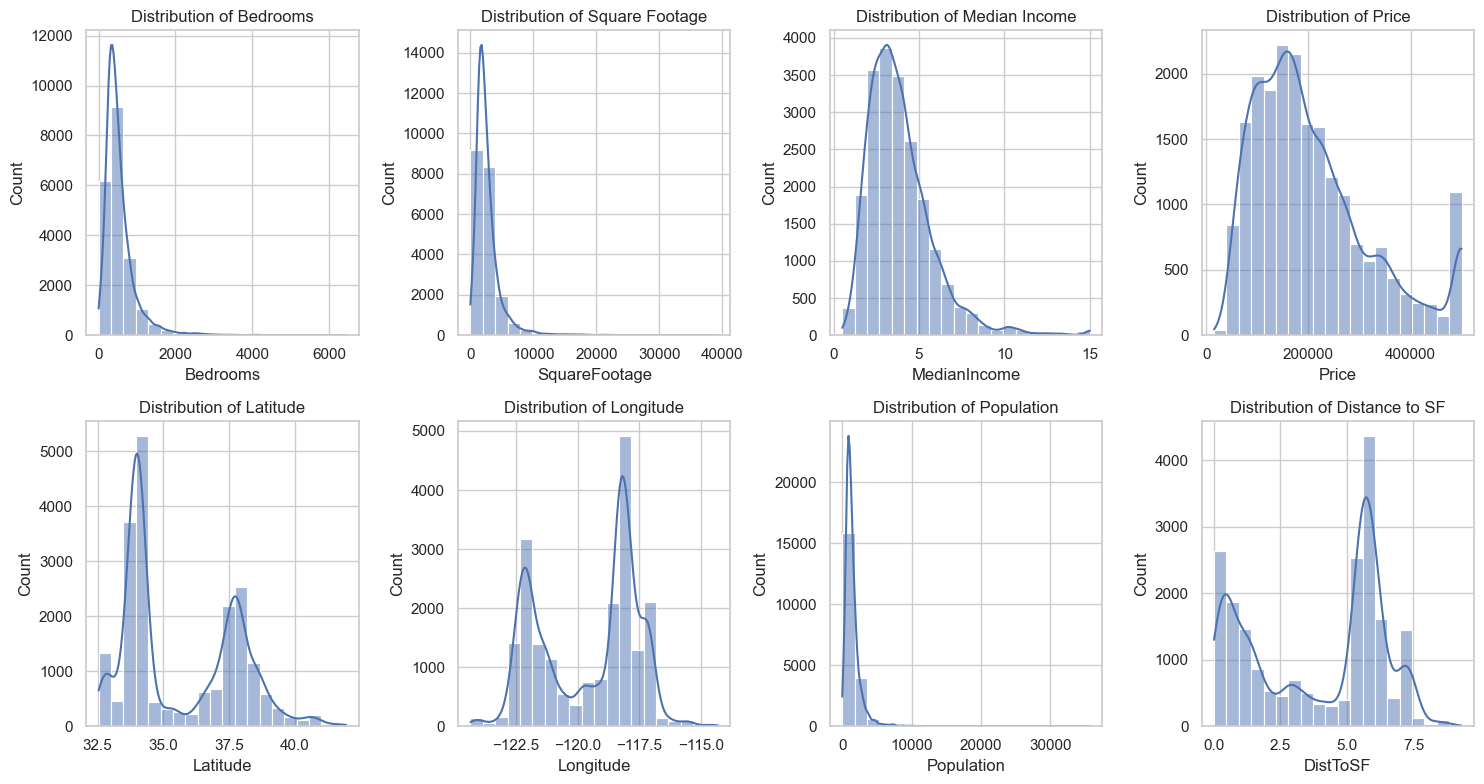

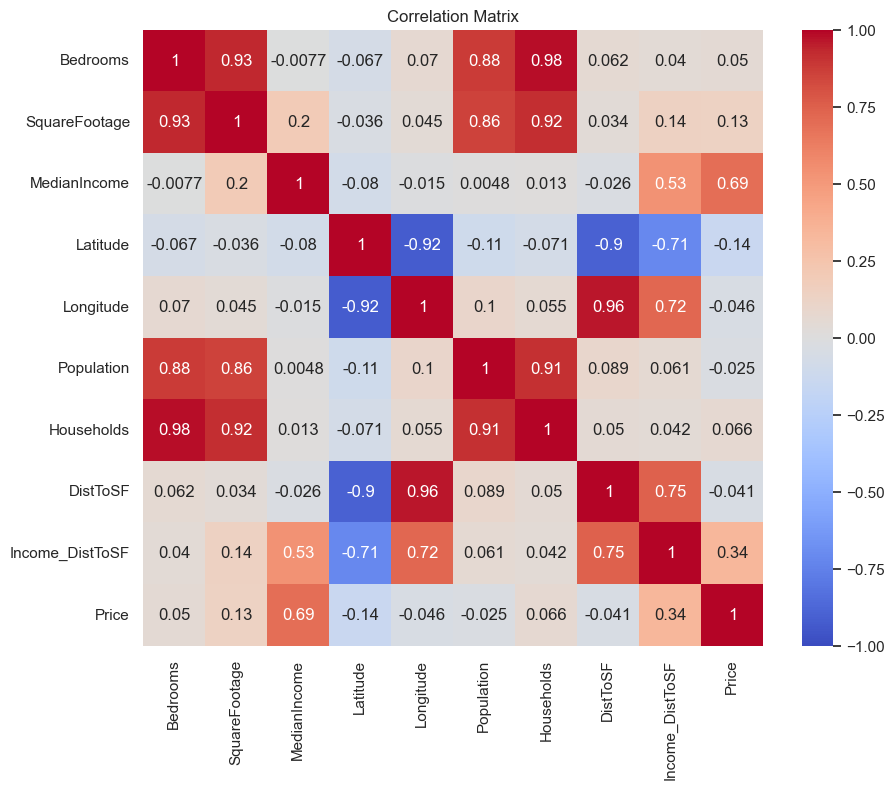

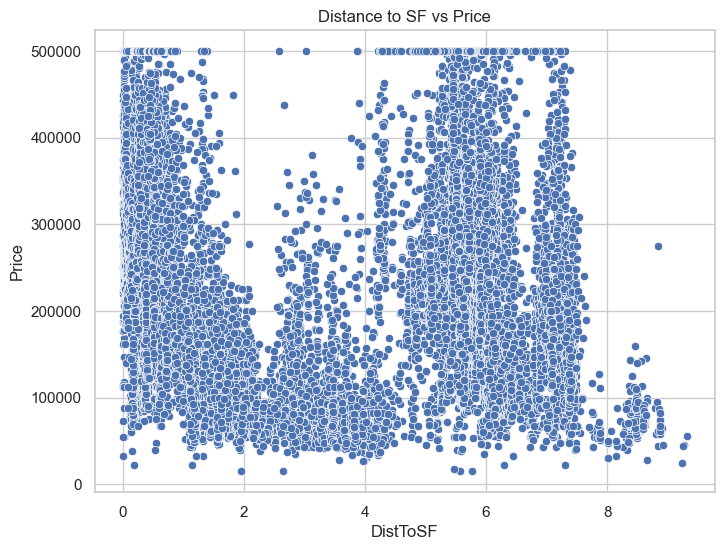

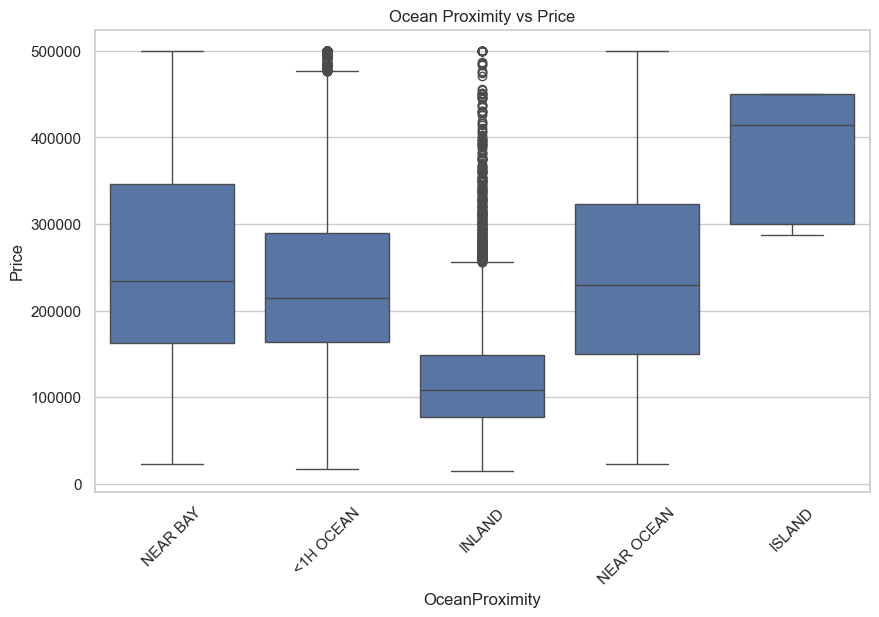


=== Data Cleaning ===
Handling missing values...
Missing values after filling:
Bedrooms           0
SquareFootage      0
MedianIncome       0
OceanProximity     0
Latitude           0
Longitude          0
Population         0
Households         0
Price              0
DistToSF           0
Income_DistToSF    0
dtype: int64
Rows after removing invalid and capped prices: 19648

=== Outlier Handling (Capping) ===

Summary Statistics after Cleaning:
           Bedrooms  SquareFootage  MedianIncome      Latitude     Longitude  \
count  19648.000000   19648.000000  19648.000000  19648.000000  19648.000000   
mean     502.462802    2424.347694      3.658429     35.651872   -119.562378   
std      283.674479    1386.824327      1.510327      2.150066      2.005760   
min        2.000000       2.000000      0.499900     32.540000   -124.350000   
25%      299.000000    1438.000000      2.526300     33.930000   -121.760000   
50%      435.000000    2111.000000      3.449050     34.270000   -118.5

C:\Users\Shivprasad\AppData\Local\Temp\ipykernel_9584\3915361626.py:100: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}

Feature Importance:
                      Feature  Importance
9       OceanProximity_INLAND    0.803244
10      OceanProximity_ISLAND    0.041944
2                MedianIncome    0.037865
7                    DistToSF    0.023745
12  OceanProximity_NEAR OCEAN    0.019030
3                    Latitude    0.016832
4                   Longitude    0.014719
11    OceanProximity_NEAR BAY    0.013865
8             Income_DistToSF    0.011593
5                  Population    0.005548
6                  Households    0.004626
1               SquareFootage    0.004334
0                    Bedrooms    0.002655


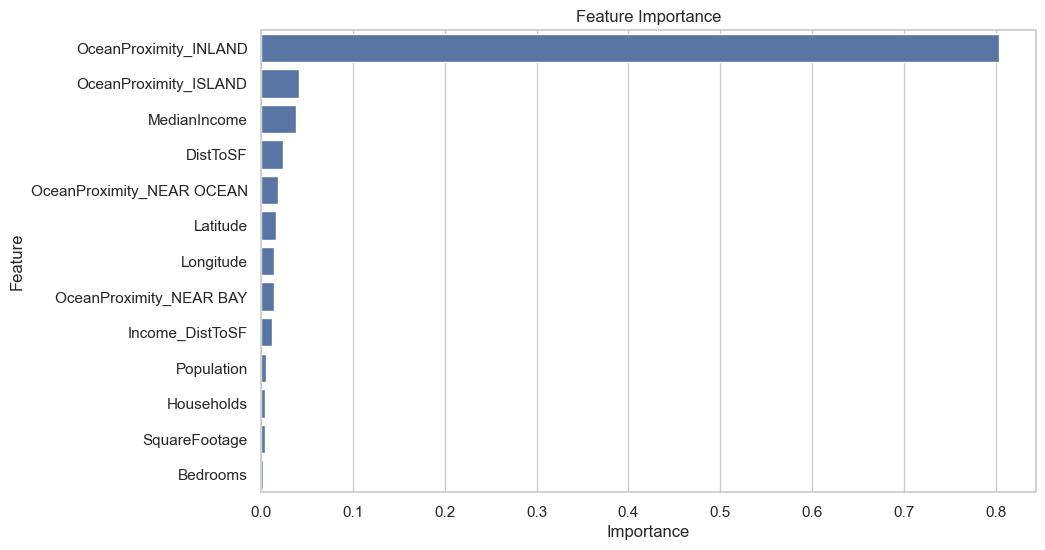


=== Cross-Validation ===


C:\Users\Shivprasad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names


Cross-validated R^2: 0.84 (+/- 0.01)

Mean Squared Error (original scale): 1757111343.57
R^2 Score (transformed scale): 0.83


C:\Users\Shivprasad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
C:\Users\Shivprasad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names


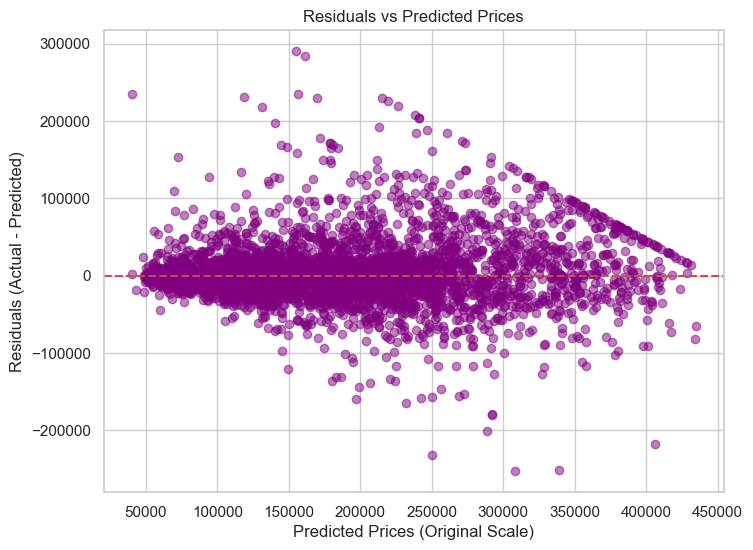

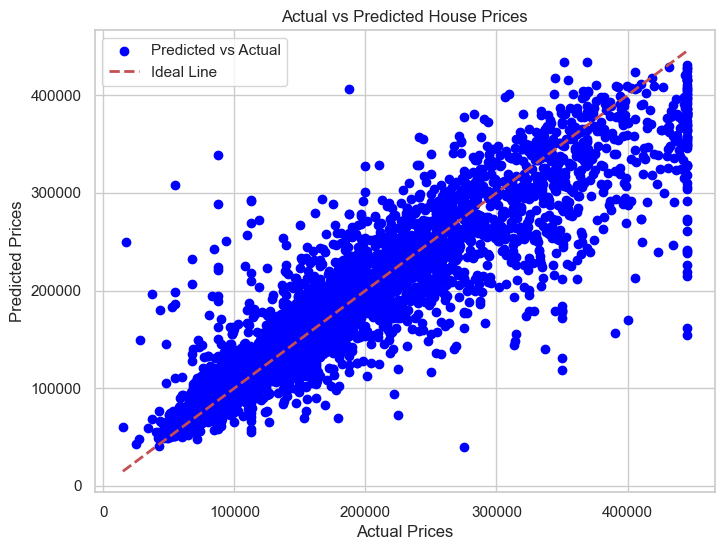

Model saved as 'house_price_model.pkl'
Scaler saved as 'scaler.pkl'
Price transformer saved as 'price_transformer.pkl'


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Set visualization style
sns.set(style="whitegrid")

# Step 1: Load the dataset
data = pd.read_csv('C:/Users/Shivprasad/Downloads/housing/housing.csv')

# Select all relevant features and rename
data = data[['total_bedrooms', 'total_rooms', 'median_income', 'ocean_proximity', 'latitude', 'longitude', 'population', 'households', 'median_house_value']]
data.columns = ['Bedrooms', 'SquareFootage', 'MedianIncome', 'OceanProximity', 'Latitude', 'Longitude', 'Population', 'Households', 'Price']

# Step 2: Feature Engineering
# Distance to San Francisco (lat: 37.7749, lon: -122.4194)
data['DistToSF'] = np.sqrt((data['Latitude'] - 37.7749)**2 + (data['Longitude'] - (-122.4194))**2)
# Add interaction term to capture combined effects
data['Income_DistToSF'] = data['MedianIncome'] * data['DistToSF']

# Step 3: Exploratory Data Analysis (EDA)
print("=== Exploratory Data Analysis ===")

# 3.1: Basic info
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# 3.2: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 3.3: Visualize distributions of numerical features
plt.figure(figsize=(15, 8))
plt.subplot(2, 4, 1)
sns.histplot(data['Bedrooms'].dropna(), bins=20, kde=True)
plt.title('Distribution of Bedrooms')

plt.subplot(2, 4, 2)
sns.histplot(data['SquareFootage'], bins=20, kde=True)
plt.title('Distribution of Square Footage')

plt.subplot(2, 4, 3)
sns.histplot(data['MedianIncome'], bins=20, kde=True)
plt.title('Distribution of Median Income')

plt.subplot(2, 4, 4)
sns.histplot(data['Price'], bins=20, kde=True)
plt.title('Distribution of Price')

plt.subplot(2, 4, 5)
sns.histplot(data['Latitude'], bins=20, kde=True)
plt.title('Distribution of Latitude')

plt.subplot(2, 4, 6)
sns.histplot(data['Longitude'], bins=20, kde=True)
plt.title('Distribution of Longitude')

plt.subplot(2, 4, 7)
sns.histplot(data['Population'], bins=20, kde=True)
plt.title('Distribution of Population')

plt.subplot(2, 4, 8)
sns.histplot(data['DistToSF'], bins=20, kde=True)
plt.title('Distribution of Distance to SF')
plt.tight_layout()
plt.show()

# 3.4: Correlation matrix (numerical features only)
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Bedrooms', 'SquareFootage', 'MedianIncome', 'Latitude', 'Longitude', 'Population', 'Households', 'DistToSF', 'Income_DistToSF', 'Price']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 3.5: Scatter plot for DistToSF vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DistToSF', y='Price', data=data)
plt.title('Distance to SF vs Price')
plt.show()

# 3.6: Boxplot for OceanProximity vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='OceanProximity', y='Price', data=data)
plt.title('Ocean Proximity vs Price')
plt.xticks(rotation=45)
plt.show()

# Step 4: Data Cleaning
print("\n=== Data Cleaning ===")

# 4.1: Handle missing values
print("Handling missing values...")
data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)
print("Missing values after filling:")
print(data.isnull().sum())

# 4.2: Remove invalid and capped prices
data = data[data['Price'] > 0]
data = data[data['Price'] < 500000]  # Remove capped prices
print(f"Rows after removing invalid and capped prices: {len(data)}")

# 4.3: Encode categorical variable (OceanProximity)
data = pd.get_dummies(data, columns=['OceanProximity'], drop_first=True)

# Step 5: Outlier Handling (Capping)
print("\n=== Outlier Handling (Capping) ===")

# 5.1: Cap outliers for numerical features
numerical_cols = ['Bedrooms', 'SquareFootage', 'MedianIncome', 'Latitude', 'Longitude', 'Population', 'Households', 'DistToSF', 'Income_DistToSF']
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# 5.2: Cap outliers in Price
Q1_price = data['Price'].quantile(0.25)
Q3_price = data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
data['Price'] = data['Price'].clip(lower=lower_bound_price, upper=upper_bound_price)

# Verify cleaned data
print("\nSummary Statistics after Cleaning:")
print(data.describe())

# Step 6: Transform Target Variable
# Use Yeo-Johnson transformation instead of log for better handling of distribution
pt = PowerTransformer(method='yeo-johnson')
data['Price'] = pt.fit_transform(data[['Price']])
joblib.dump(pt, 'price_transformer.pkl')  # Save transformer for UI

# Step 7: Prepare Data for Modeling
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# 7.1: Feature Scaling
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train XGBoost Model with Hyperparameter Tuning
print("\n=== Training XGBoost Model ===")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
model = XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Step 8.1: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()

# Step 9: Cross-Validation
print("\n=== Cross-Validation ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratify_col = pd.qcut(pt.inverse_transform(y.values.reshape(-1, 1)).flatten(), q=5, labels=False)  # Quantile-based bins
cv_scores = cross_val_score(model, X, y, cv=cv.split(X, stratify_col), scoring='r2')
print(f"Cross-validated R^2: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Step 10: Make Predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate Model (on original scale)
y_test_original = pt.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_original = pt.inverse_transform(y_pred.reshape(-1, 1)).flatten()
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (original scale): {mse:.2f}")
print(f"R^2 Score (transformed scale): {r2:.2f}")

# Step 11.1: Residual Analysis
residuals = y_test_original - y_pred_original
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_original, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (Original Scale)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Prices')
plt.show()

# Step 12: Visualize Actual vs Predicted Prices (original scale)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', label='Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# Step 13: Save Model and Scaler for UI
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved as 'house_price_model.pkl'")
print("Scaler saved as 'scaler.pkl'")
print("Price transformer saved as 'price_transformer.pkl'")